In [1]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

C:\Users\lenovo Thinkpad\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#cpu - gpu configuration
config = tf.ConfigProto( device_count = {'GPU': 0 , 'CPU': 56} ) #max: 1 gpu, 56 cpu
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

In [3]:
#variables
num_classes = 7 #angry, disgust, fear, happy, sad, surprise, neutral
batch_size = 125
epochs = 35

In [4]:
with open(r"C:\Users\lenovo Thinkpad\Face_dataset\fer2013.csv") as f:
    content = f.readlines()

lines = np.array(content)

num_of_instances = lines.size
print("number of instances: ",num_of_instances)
print("instance length: ",len(lines[1].split(",")[1].split(" ")))


number of instances:  35888
instance length:  2304


In [5]:
#initialize trainset and test set
x_train, y_train, x_test, y_test = [], [], [], []

In [6]:
#transfer train and test set data
for i in range(1,num_of_instances):
    try:
        emotion, img, usage = lines[i].split(",")
          
        val = img.split(" ")
            
        pixels = np.array(val, 'float32')
        
        emotion = keras.utils.to_categorical(emotion, num_classes)
    
        if 'Training' in usage:
            y_train.append(emotion)
            x_train.append(pixels)
        elif 'PublicTest' in usage:
            y_test.append(emotion)
            x_test.append(pixels)
    except:
        print("",end="")

In [7]:
#data transformation for train and test sets
x_train = np.array(x_train, 'float32')
y_train = np.array(y_train, 'float32')
x_test = np.array(x_test, 'float32')
y_test = np.array(y_test, 'float32')

x_train /= 255 #normalize inputs between [0, 1]
x_test /= 255

x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
x_train = x_train.astype('float32')
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
x_test = x_test.astype('float32')

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

28709 train samples
3589 test samples


In [11]:
model = Sequential()

#1st convolution layer
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))

#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

model.add(Flatten())

#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [13]:
#batch process
gen = ImageDataGenerator()
train_generator = gen.flow(x_train, y_train, batch_size=batch_size)

In [14]:
model.compile(loss='categorical_crossentropy'
    , optimizer=keras.optimizers.Adam()
    , metrics=['accuracy']
)

In [12]:
fit = True

if fit == True:
	#model.fit_generator(x_train, y_train, epochs=epochs) #train for all trainset
    model.fit_generator(train_generator, steps_per_epoch=125, epochs=35) #train for randomly selected one

Instructions for updating:
Use tf.cast instead.
Epoch 1/35
125/125 [==============================] - 502s 4s/step - loss: 1.8184 - acc: 0.2501
Epoch 2/35
125/125 [==============================] - 461s 4s/step - loss: 1.7508 - acc: 0.2787
Epoch 3/35
125/125 [==============================] - 470s 4s/step - loss: 1.6021 - acc: 0.3622
Epoch 4/35
125/125 [==============================] - 468s 4s/step - loss: 1.5049 - acc: 0.4122
Epoch 5/35
125/125 [==============================] - 468s 4s/step - loss: 1.4249 - acc: 0.4498
Epoch 6/35
125/125 [==============================] - 470s 4s/step - loss: 1.3540 - acc: 0.4797
Epoch 7/35
125/125 [==============================] - 466s 4s/step - loss: 1.2859 - acc: 0.5012
Epoch 8/35
125/125 [==============================] - 465s 4s/step - loss: 1.2488 - acc: 0.5208
Epoch 9/35
125/125 [==============================] - 466s 4s/step - loss: 1.2078 - acc: 0.5388
Epoch 10/35
125/125 [==============================] - 461s 4s/step - loss: 1.1716 - acc

In [15]:
model.save('Face expression recognition.h5')

In [8]:
from keras.models import load_model
model=load_model('Face expression recognition.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [12]:

#overall evaluation
score = model.evaluate(x_train, y_train)
print('Train loss:', score[0])
print('Train accuracy:', 100*score[1])

28709/28709 [==============================] - 190s 7ms/step
Train loss: 0.30197933177023856
Train accuracy: 89.19850917851407


In [13]:
#function for drawing bar chart for emotion preditions
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

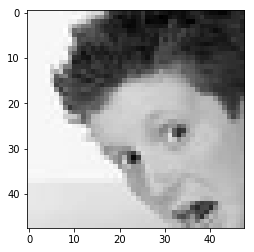

[2.9776365e-01 1.1931627e-04 6.1482720e-02 2.7662858e-02 1.4121901e-02
 5.9477347e-01 4.0760655e-03]


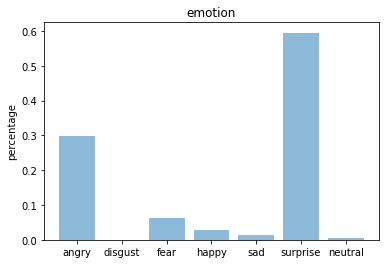

----------------------------------------------


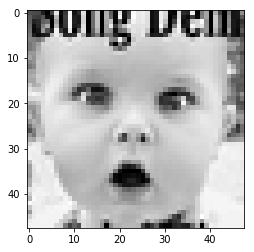

[1.1657312e-08 3.7327145e-13 5.7742373e-08 5.0613319e-11 2.6568062e-12
 9.9999988e-01 2.1295940e-12]


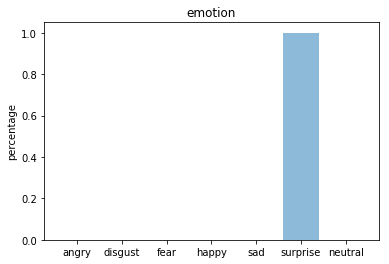

----------------------------------------------


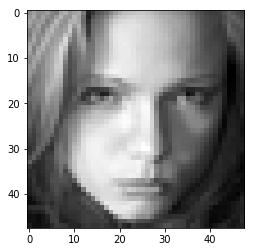

[4.9037687e-02 1.7451384e-08 6.4249910e-02 2.0655407e-06 3.5728264e-01
 5.0223357e-06 5.2942258e-01]


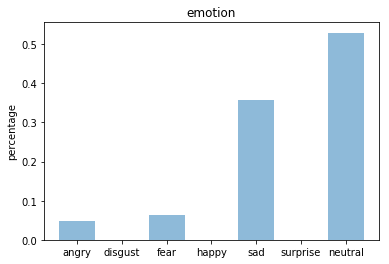

----------------------------------------------


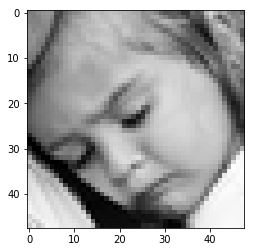

[3.2584961e-05 1.3949438e-09 5.1589165e-04 2.7880329e-03 3.5439998e-01
 3.1261041e-07 6.4226323e-01]


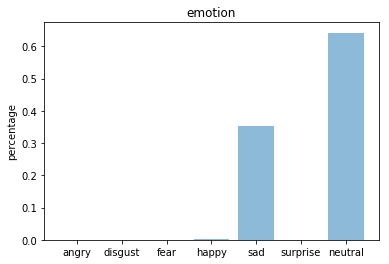

----------------------------------------------


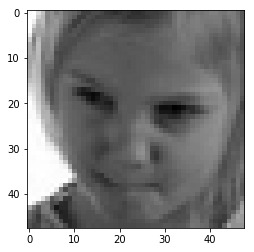

[9.5933288e-01 3.5039186e-03 1.1804334e-02 1.6247145e-03 2.3530385e-02
 1.4346232e-05 1.8938300e-04]


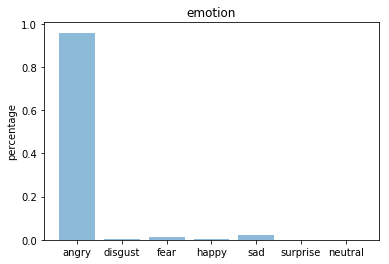

----------------------------------------------


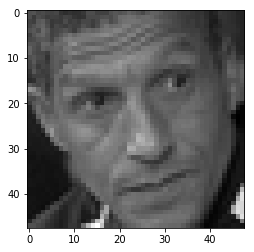

[7.01542199e-01 1.09800734e-04 1.77087888e-01 2.89017247e-04
 4.43220995e-02 6.61800243e-03 7.00310245e-02]


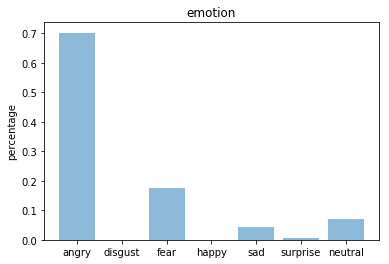

----------------------------------------------


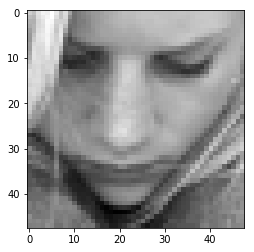

[5.3293526e-04 1.6454201e-09 1.3580430e-01 1.5070361e-04 8.3218592e-01
 3.3953743e-06 3.1322811e-02]


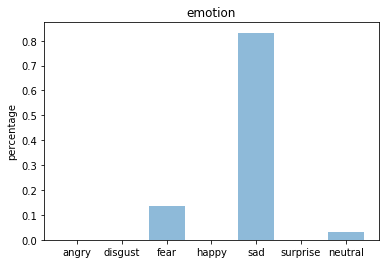

----------------------------------------------


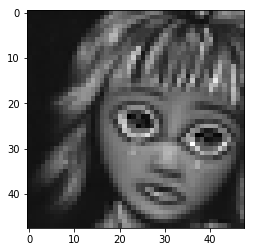

[1.8926794e-02 2.6134371e-06 5.2623516e-01 2.5407106e-03 4.3372843e-01
 9.6608285e-04 1.7600181e-02]


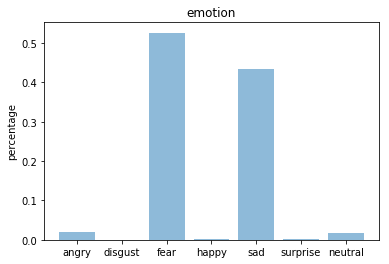

----------------------------------------------


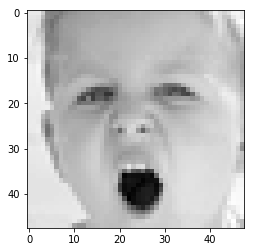

[9.8950082e-01 1.8459385e-08 2.2105449e-04 5.0417316e-06 5.7945585e-06
 1.0220390e-02 4.6809488e-05]


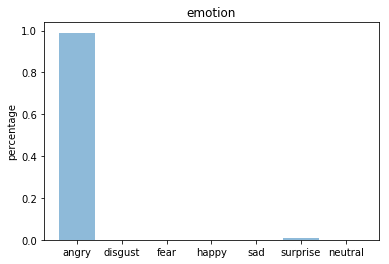

----------------------------------------------


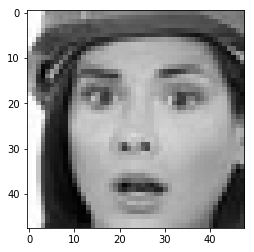

[5.1162101e-06 1.8015404e-08 1.2997040e-04 2.1106661e-08 6.1750205e-09
 9.9986482e-01 1.7794398e-10]


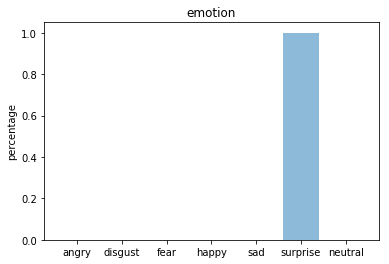

----------------------------------------------


In [15]:
monitor_testset_results = True

if monitor_testset_results == True:
#make predictions for test set
    predictions = model.predict(x_test)

    index = 0
    for i in predictions:
        if index < 30 and index >= 20:
        #print(i) #predicted scores
        #print(y_test[index]) #actual scores

            testing_img = np.array(x_test[index], 'float32')
            testing_img = testing_img.reshape([48, 48]);
            
            plt.gray()
            plt.imshow(testing_img)
            plt.show()
            print(i)
            emotion_analysis(i)
            print("----------------------------------------------")
        index = index + 1

C:\Users\lenovo Thinkpad\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


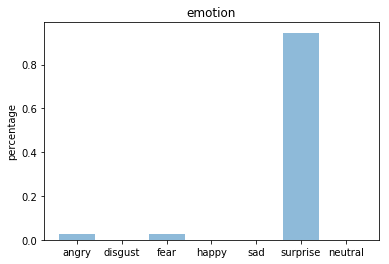

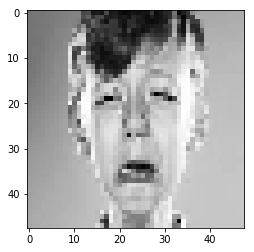

In [25]:
#make prediction for custom image out of test set

img = image.load_img(r"C:\Users\lenovo Thinkpad\Desktop\sad2.jpg", grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(x)
plt.show()

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = model.predict(x_test)
pred_list = []; actual_list = []
 
for i in predictions:
 
    pred_list.append(np.argmax(i))
 
for i in y_test:
 
    actual_list.append(np.argmax(i))
 
confusion_matrix(actual_list, pred_list)

array([[248,   6,  61,  37,  50,  20,  45],
       [ 18,  26,   6,   3,   2,   0,   1],
       [ 81,   4, 221,  30,  66,  37,  57],
       [ 48,   0,  44, 676,  40,  25,  62],
       [121,   1, 126,  56, 218,  16, 115],
       [ 25,   3,  34,  13,  12, 314,  14],
       [ 73,   2,  73,  55,  92,  12, 300]], dtype=int64)